In [1]:
# importing all required packages & notebook extensions at the start of the notebook
import os
import pandas as pd
import qiime2 as q2
from qiime2 import Visualization
import matplotlib.pyplot as plt
%matplotlib inline
from operator import itemgetter
import matplotlib.patches as mpatches
from scipy.stats import shapiro

or_dir = '../data' #original data (demux sequences, metadata)
data_dir = 'data' #data from polybox (ASV, taxonomy analysis)


# Getting data from polybox

In [4]:
#! wget -nv -O data.zip 'https://polybox.ethz.ch/index.php/s/pNA39R0rl2xMMj9/download'
#! unzip -q data.zip #-d $data_dir
#! mv data data2
#! mv data2/taxonomy/data .
#! cp data2/ASV/data/* data
#! cp data2/Phylogeny/data/* data
#! rm -r data2
#! rm data.zip

2022-11-16 09:54:39 URL:https://polybox.ethz.ch/index.php/s/pNA39R0rl2xMMj9/download [903127525] -> "data.zip" [1]


In [2]:
! pwd

/home/jovyan/HelicopterBaby/Phylogeny, alpha and beta diversity


# Running the standard alpha diversity analysis

Q: should we use filtered table or not???

In [6]:
#metadata = pd.read_csv(or_dir + '/metadata.tsv', sep = '\t')
#print(metadata.columns)

Index(['id', 'Library Layout', 'Instrument', 'collection_date',
       'geo_location_name', 'geo_latitude', 'geo_longitude', 'host_id',
       'age_days', 'weight_kg', 'length_cm', 'WAZ', 'HAZ', 'WHZ', 'BMI',
       'birth_weight_g', 'birth_length_cm', 'sex', 'delivery_mode', 'zygosity',
       'race', 'ethnicity', 'delivery_preterm', 'diet_milk', 'diet_weaning',
       'age_months'],
      dtype='object')


In [7]:
#del metadata['collection_date']
#metadata.to_csv(data_dir+"/new_metadata_for_a_diversity.tsv", sep = "\t", index = False)

In [8]:
! qiime feature-table summarize \
  --i-table $data_dir/phylogeny_filtered_table.qza \
  --m-sample-metadata-file $data_dir/new_metadata_for_a_diversity.tsv \
  --o-visualization $data_dir/feature-table2.qzv
#$or_dir/metadata.tsv \

Saved Visualization to: data/feature-table2.qzv


In [3]:
Visualization.load(f'{data_dir}/feature-table2.qzv')

<visualization: Visualization uuid: 20649910-fd10-4aef-9a69-374cf8b85f3b>

In [10]:
! qiime diversity alpha-rarefaction \
    --i-table $data_dir/phylogeny_filtered_table.qza \
    --i-phylogeny $data_dir/reference-tree.qza \
    --p-max-depth 10000 \
    --m-metadata-file $data_dir/new_metadata_for_a_diversity.tsv \
    --o-visualization $data_dir/alpha-rarefaction2.qzv
#$or_dir/metadata.tsv \

Saved Visualization to: data/alpha-rarefaction2.qzv


Chose 10k max depth, and since graphs level off before that, this makes sense.

In [4]:
Visualization.load(f'{data_dir}/alpha-rarefaction2.qzv')

<visualization: Visualization uuid: b312c943-b7f1-45c0-a863-95a4aa5e468b>

In [13]:
! qiime diversity core-metrics-phylogenetic \
  --i-table $data_dir/phylogeny_filtered_table.qza \
  --i-phylogeny $data_dir/reference-tree.qza \
  --m-metadata-file $data_dir/new_metadata_for_a_diversity.tsv \
  --p-sampling-depth 8000 \
  --output-dir $data_dir/core-metrics-results2
#$or_dir/metadata.tsv \

Saved FeatureTable[Frequency] to: data/core-metrics-results2/rarefied_table.qza
Saved SampleData[AlphaDiversity] to: data/core-metrics-results2/faith_pd_vector.qza
Saved SampleData[AlphaDiversity] to: data/core-metrics-results2/observed_features_vector.qza
Saved SampleData[AlphaDiversity] to: data/core-metrics-results2/shannon_vector.qza
Saved SampleData[AlphaDiversity] to: data/core-metrics-results2/evenness_vector.qza
Saved DistanceMatrix to: data/core-metrics-results2/unweighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: data/core-metrics-results2/weighted_unifrac_distance_matrix.qza
Saved DistanceMatrix to: data/core-metrics-results2/jaccard_distance_matrix.qza
Saved DistanceMatrix to: data/core-metrics-results2/bray_curtis_distance_matrix.qza
Saved PCoAResults to: data/core-metrics-results2/unweighted_unifrac_pcoa_results.qza
Saved PCoAResults to: data/core-metrics-results2/weighted_unifrac_pcoa_results.qza
Saved PCoAResults to: data/core-metrics-results2/jaccard_pcoa_re

In [14]:
! pwd

/home/jovyan/HelicopterBaby/Phylogeny, alpha and beta diversity


In [15]:
! qiime diversity alpha-group-significance \
  --i-alpha-diversity $data_dir/core-metrics-results2/faith_pd_vector.qza \
  --m-metadata-file $data_dir/new_metadata_for_a_diversity.tsv \
  --o-visualization $data_dir/core-metrics-results2/faith-pd-group-significance.qzv

Saved Visualization to: data/core-metrics-results2/faith-pd-group-significance.qzv


In [14]:
Visualization.load(f'{data_dir}/core-metrics-results2/faith-pd-group-significance.qzv')

<visualization: Visualization uuid: c2bb025e-6ae5-427c-bb41-b89ebc1f955e>

In [18]:
! qiime diversity alpha-correlation \
  --i-alpha-diversity $data_dir/core-metrics-results2/faith_pd_vector.qza \
  --m-metadata-file $data_dir/new_metadata_for_a_diversity.tsv \
  --o-visualization $data_dir/core-metrics-results2/faith-pd-group-significance-numeric.qzv

Saved Visualization to: data/core-metrics-results2/faith-pd-group-significance-numeric.qzv


In [13]:
Visualization.load(f'{data_dir}/core-metrics-results2/faith-pd-group-significance-numeric.qzv')

<visualization: Visualization uuid: e76798ad-ff52-46c1-8c42-1de88d5564fc>

# Alpha diversity and metadata



In [4]:
#only need to load this file
#metadata_correlation_z.tsv
#this alpha_meta is for the later steps
alpha_meta = pd.read_csv(data_dir + '/metadata_correlation_z.tsv', sep = '\t')
alpha_meta.head(5)

,id,Library Layout,Instrument,geo_location_name,geo_latitude,geo_longitude,host_id,age_days,weight_kg,length_cm,...,sex,delivery_mode,zygosity,race,ethnicity,delivery_preterm,diet_milk,diet_weaning,age_months,faith_pd
0,ERR1314183,PAIRED,Illumina MiSeq,"USA, Missouri, St. Louis",38.63699,-90.263794,27.2,192.0,NaN,NaN,...,female,Cesarean,Dizygotic,Caucasian,Hispanic,True,fd,True,6.0,30.175526
1,ERR1314184,PAIRED,Illumina MiSeq,"USA, Missouri, St. Louis",38.63699,-90.263794,28.1,536.0,NaN,NaN,...,female,Cesarean,Monozygotic,Caucasian,Not Hispanic,False,NaN,NaN,18.0,37.268308
2,ERR1314185,PAIRED,Illumina MiSeq,"USA, Missouri, St. Louis",38.63699,-90.263794,28.2,537.0,NaN,NaN,...,female,Cesarean,Monozygotic,Caucasian,Not Hispanic,False,NaN,NaN,18.0,40.752618
3,ERR1314186,PAIRED,Illumina MiSeq,"USA, Missouri, St. Louis",38.63699,-90.263794,39.2,688.0,NaN,NaN,...,male,Cesarean,Monozygotic,African-American,Not Hispanic,True,NaN,NaN,23.0,47.534627
4,ERR1314187,PAIRED,Illumina MiSeq,"USA, Missouri, St. Louis",38.63699,-90.263794,8.1,388.0,NaN,NaN,...,male,Vaginal,Dizygotic,Caucasian,Not Hispanic,False,no milk,True,13.0,42.995149


In [28]:
#creat the metadata_correlation table
#md = pd.read_csv(os.path.join(data_dir, 'new_metadata_for_a_diversity.tsv'), sep='\t', index_col=0)
#ndf = pd.concat([md, div], axis = 1)
#ndf.head(5)
#ndf = ndf.reset_index()
#ndf.rename(columns = {'index':'id'}, inplace = True)
#ndf.columns
#save the results as the metadata_correlation.tsv
#ndf.to_csv("./data/metadata_correlation.tsv", sep = "\t", index = False)

In [29]:
#create the metadata_correlation.tsv: the table for the a diversity and different columns
#div = q2.Artifact.load(os.path.join(data_dir, 'core-metrics-results2/faith_pd_vector.qza')).view(pd.Series)


In [30]:
#pd.read_csv(data_dir + '/metadata_correlation.tsv', sep = '\t').head(5)

In [8]:
alpha_diversities = pd.read_csv(data_dir + '/metadata_correlation.tsv', sep = '\t')
alpha_diversities = alpha_diversities.iloc[1:,:]



# prints to check
#print(alpha_diversities['faith_pd'].isna().sum())
#print(alpha_meta.columns)
#print(metadata.shape)
#print(alpha_diversities.shape)
#print(alpha_meta.shape)
#print(metadata.index[-1])
#print(metadata.index == alpha_diversities.index)
#print(alpha_diversities['WAZ'] == metadata['WAZ'])
#print(alpha_diversities.head())
#print(metadata.head())
#print(alpha_meta.head())

In [8]:
#a_ind = set(alpha_diversities.index)

In [10]:
metadata = pd.read_csv(data_dir + '/new_metadata_for_a_diversity.tsv', sep = '\t')

In [14]:
#m_ind = set(metadata.index)

In [31]:
#m_ind ^ a_ind

In [18]:
# check if indices match
#m_ind = set(metadata.index)
#a_ind = set(alpha_diversities.index)
#diff = m_ind ^ a_ind
#print(diff)

In [32]:
#metadata.columns

In [20]:
# set id as index
#metadata = metadata.set_index(['id'])
#alpha_diversities = alpha_diversities.set_index('id')
#metadata.drop(diff)


In [21]:
#alpha_meta = pd.concat([metadata, alpha_diversities], axis =1, join = 'inner')
#alpha_meta = alpha_meta.T.drop_duplicates().T

In [33]:
#alpha_meta.head(5)
#alpha_meta = alpha_meta.reset_index()

In [23]:
#alpha_meta = alpha_meta.reset_index()

In [34]:
#alpha_meta.head(5)

In [25]:
#make the table into a csv doc, and this one contains all the information we need to a diversity
#alpha_meta.to_csv("./data/metadata_correlation_z.tsv", sep = "\t", index = False)


In [35]:
#alpha_meta = 0
#alpha_meta = pd.read_csv(data_dir + '/metadata_correlation_z.tsv', sep = '\t')
#alpha_meta.head(5)

## Weaning

In [6]:
id_weaning = alpha_meta[alpha_meta['diet_weaning'] == True]['id']
print(id_weaning.shape)
id_not_weaning = alpha_meta[alpha_meta['diet_weaning'] == False]['id']
print(id_not_weaning.shape)
unassigned_weaning = alpha_meta['diet_weaning'].isna().sum()
#print('Percentage of unassigned to weaning data = ' + str(unassigned_weaning/metadata.shape[0]*100))
print(unassigned_weaning)

(567,)
(175,)
926


In [34]:
#id_weaning = metadata[metadata['diet_weaning'] == True]['id']
#print(id_weaning.shape)
#id_not_weaning = metadata[metadata['diet_weaning'] == False]['id']
#print(id_not_weaning.shape)
#unassigned_weaning = metadata['diet_weaning'].isna().sum()
#print('Percentage of unassigned to weaning data = ' + str(unassigned_weaning/metadata.shape[0]*100))
#print(unassigned_weaning)

### Scatter plot of alpha diversity vs age with weaning coloured and hist of alpha diversity vs weaning

[ShapiroResult(statistic=nan, pvalue=1.0), ShapiroResult(statistic=0.8260548114776611, pvalue=3.57806910185679e-13), ShapiroResult(statistic=0.96043860912323, pvalue=3.970726132336393e-15)]
the shapiro test shows that our data is not normally distributed


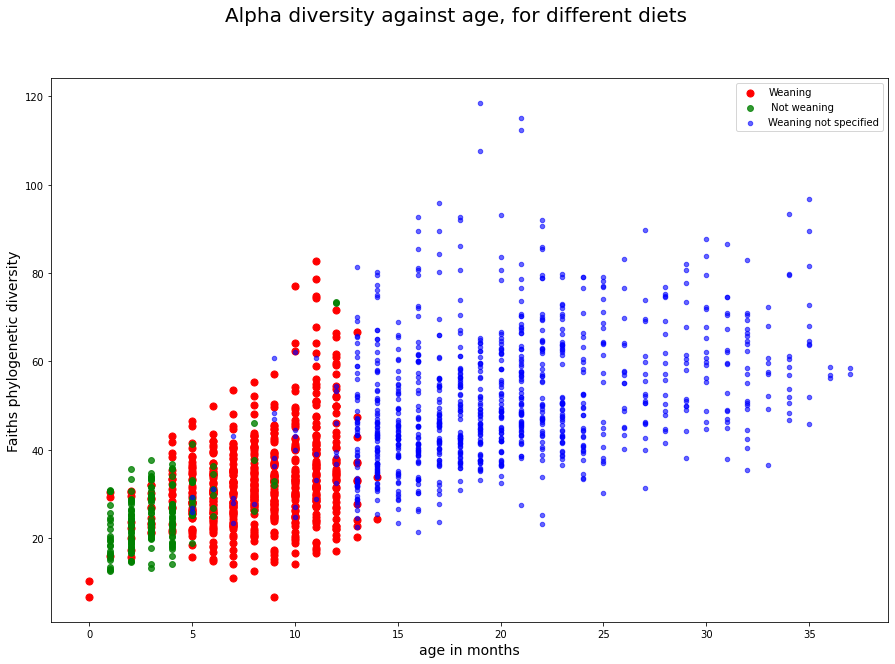

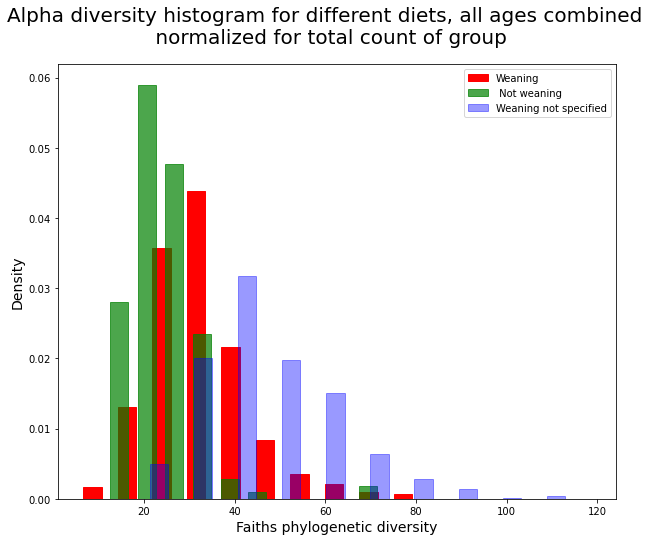

In [11]:
# map weaning to colours 
colours_weaning = {True:'red', False:'green', 'na':'blue'}#, 'other':'black'}

# plot the alpha diversity against age, for different weaning status = different colour
fig, ax = plt.subplots(figsize = (15,10))
fig2, ax2 = plt.subplots(figsize=(10,8))
weaning_options = [True, False]
labels = ['Weaning', ' Not weaning', 'Weaning not specified']
shapiro_weaning = list()
i=0
for key in colours_weaning:
    if type(key) != str:
        subs = alpha_diversities.loc[metadata['diet_weaning'] == weaning_options[i], ]
    else:
        subs = alpha_diversities.loc[metadata['diet_weaning'].isna(), ]
    ax.scatter(subs['age_months'].astype(int), subs['faith_pd'].astype(float), 
               color = colours_weaning[key], s = 50-i*15, label = labels[i],
              zorder = i, alpha = 1-i*0.2)
    ax2.hist(subs['faith_pd'].astype(float), 
               color = colours_weaning[key], label = labels[i], width = 4,
              #align = aligns[i], 
             density = True, alpha = 1-i*0.3, edgecolor = colours_weaning[key])
    shapiro_weaning.append(shapiro(subs['faith_pd'].astype(float)))
    i = i+1
ax.legend()
ax.set_xlabel('age in months',  fontsize = 14)
ax.set_ylabel('Faiths phylogenetic diversity',  fontsize = 14)
fig.suptitle('Alpha diversity against age, for different diets',  fontsize = 20)

ax2.legend()
ax2.set_xlabel('Faiths phylogenetic diversity',  fontsize = 14)
ax2.set_ylabel('Density',  fontsize = 14)
fig2.suptitle('Alpha diversity histogram for different diets, all ages combined \n normalized for total count of group',  fontsize = 20)

print(shapiro_weaning)
print('the shapiro test shows that our data is not normally distributed')

## Breast or formula milk

fd
bd
no milk
False
[ShapiroResult(statistic=0.9216764569282532, pvalue=6.654293480607744e-17), ShapiroResult(statistic=nan, pvalue=1.0), ShapiroResult(statistic=0.9481518268585205, pvalue=0.15081679821014404), ShapiroResult(statistic=0.96043860912323, pvalue=3.970726132336393e-15)]
the shapiro test shows that our data is not normally distributed for the formula milk and milk not specified


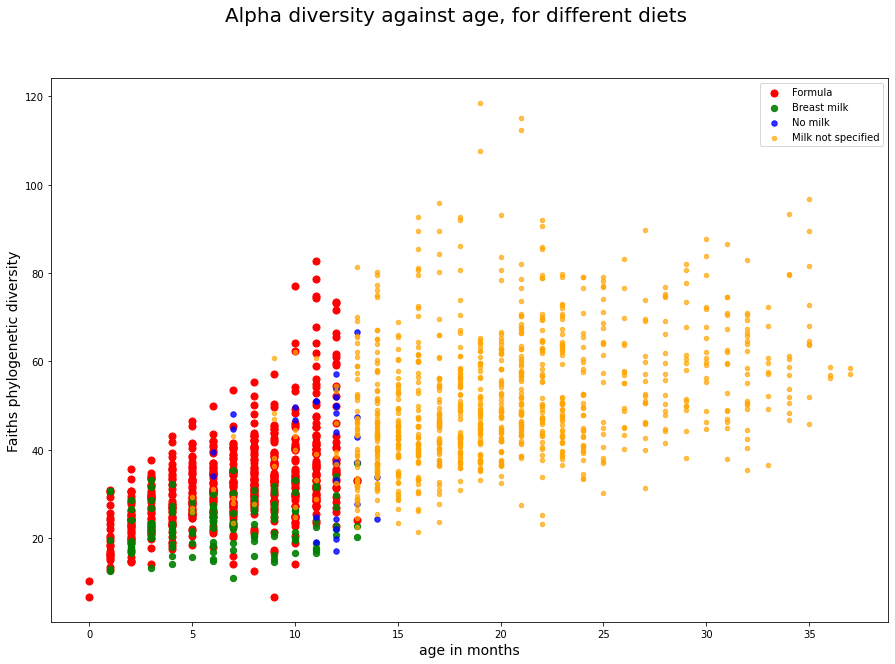

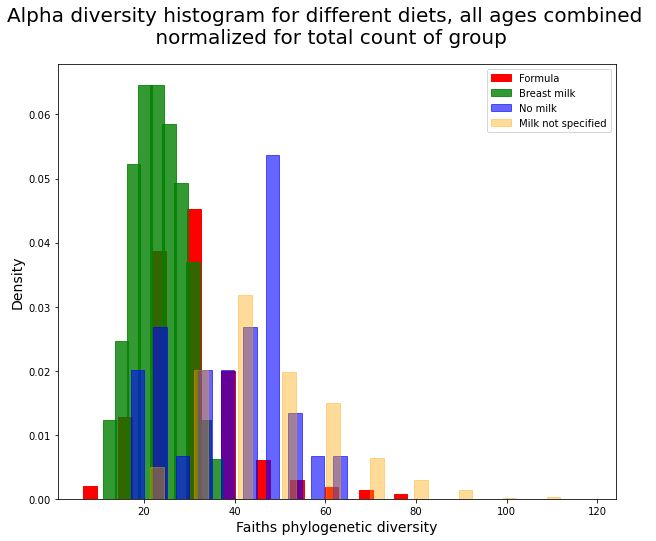

In [12]:
# map weaning to colours 
#formula_breast = metadata_ordered['diet_milk'].fillna('na')
formula_breast = alpha_meta['diet_milk'].fillna('na')
color_formula_breast = {'fd': 'red', 'bd': 'green', 'no milk': 'blue', False: 'orange'}

# plot the alpha diversity against age, for different weaning status = different colour
fig, ax = plt.subplots(figsize = (15,10))
fig2, ax2 = plt.subplots(figsize=(10,8))
labels = ['Formula', 'Breast milk', 'No milk', 'Milk not specified']
diet_milk_options = ['fd','bd', 'no milk']
shapiro_milk = list()

i=0
for key in color_formula_breast:
    print(key)
    if type(key) == str:
        subs = alpha_diversities.loc[metadata['diet_milk'] == key, ]
    else:
        subs = alpha_diversities.loc[metadata['diet_milk'].isna(), ]
    ax.scatter(subs['age_months'].astype(int), subs['faith_pd'].astype(float), 
               color = color_formula_breast[key], s = 50-i*10, label = labels[i],
              zorder = i, alpha = 1-i*0.1)
    ax2.hist(subs['faith_pd'].astype(float), 
               color = color_formula_breast[key], label = labels[i], width = 3,
               density = True, alpha = 1-i*0.2, edgecolor = color_formula_breast[key]) #align = aligns[i],
    i = i+1
    shapiro_milk.append(shapiro(subs['faith_pd'].astype(float)))
    #if i == 1:
    #        break
ax.legend()
ax.set_xlabel('age in months',  fontsize = 14)
ax.set_ylabel('Faiths phylogenetic diversity',  fontsize = 14)
fig.suptitle('Alpha diversity against age, for different diets',  fontsize = 20)

ax2.legend()
ax2.set_xlabel('Faiths phylogenetic diversity',  fontsize = 14)
ax2.set_ylabel('Density',  fontsize = 14)
fig2.suptitle('Alpha diversity histogram for different diets, all ages combined \n normalized for total count of group',  fontsize = 20)

print(shapiro_milk)
print('the shapiro test shows that our data is not normally distributed for the formula milk and milk not specified')

## Check for normality

In [ ]:
# Shapiro Wilk Test
from scipy.stats import shapiro



### Somehow combine weaning and milk type? even useful?

In [10]:
from matplotlib.legend_handler import HandlerPatch

# sort by the id found in the alpha_diversity and set id as index
metadata_ordered = metadata.set_index('id')
metadata_ordered = metadata_ordered.loc[alpha_diversities['id'], ]
alpha_div_ordered = alpha_diversities.set_index('id')

# map weaning to colours 
colours_weaning = {True:'red', False:'green', 'na':'blue'}#, 'other':'black'}

formula_breast = metadata_ordered['diet_milk'].fillna('na')
marker_formula_breast = {'bd': 'o', 'fd': 'x', False: '*', 'no milk': 'v'}

# plot the alpha diversity against age, for different weaning status = different colour
fig, ax = plt.subplots(figsize = (15,10))
weaning_options = [True, False]
diet_milk_options = ['fd','bd']
labels = ['Weaning and', ' Not weaning', 'Weaning not specified']
i=0
#for mark_key in marker_formula_breast:
for key in colours_weaning:
    if type(key) != str:
        subs = alpha_div_ordered[metadata_ordered['diet_weaning'] == weaning_options[i] ]
        subs_milk = formula_breast[metadata_ordered['diet_weaning'] == weaning_options[i] ]
    else:
        subs = alpha_div_ordered[metadata_ordered['diet_weaning'].isna() ]
        subs_milk = formula_breast[metadata_ordered['diet_weaning'].isna() ]
    ax.scatter(subs['age_months'].astype(int), subs['faith_pd'].astype(float), 
               color = colours_weaning[key], s = 50-i*15, label = labels[i],
              zorder = i, alpha = 1-i*0.2, marker = subs_milk.map(lambda x: marker_formula_breast[x]))
    i = i+1
ax.legend()
ax.set_xlabel('age in months')
ax.set_ylabel('Faiths phylogenetic diversity')
fig.suptitle('Alpha diversity against age, for different diets')

KeyError: "None of ['id'] are in the columns"

In [126]:
subs_milk.map(lambda x: marker_formula_breast[x])

id
ERR1314182    x
ERR1314183    x
ERR1314187    v
ERR1314188    v
ERR1314190    x
             ..
ERR1310696    x
ERR1310701    x
ERR1310702    x
ERR1310707    x
ERR1310708    x
Name: diet_milk, Length: 567, dtype: object